In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.autograd import Variable
from sklearn import datasets
import torch

In [5]:
read_data = datasets.load_iris()
data = read_data.data
target = read_data.target
data = pandas.DataFrame(data)
target = pandas.DataFrame(target)
data = pandas.concat([data, target], axis=1)
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
# Split the data into train and test
train = data.sample(frac=0.8, random_state=200)
test = data.drop(train.index)

# Convert the data into tensors
train_x = torch.from_numpy(train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values).float()
train_y = torch.from_numpy(train[['target']].values)
test_x = torch.from_numpy(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values).float()
test_y = torch.from_numpy(test[['target']].values)

In [13]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 =  nn.Linear(4, 8)
        self.a1 = nn.ReLU()
        self.layer2 = nn.Linear(8, 16)
        self.a2 = nn.Sigmoid()
        self.layer3 = nn.Linear(16, 10)
        self.a3 = nn.ReLU()
        self.layer4 = nn.Linear(10,3)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.a1(x)
        x = self.layer2(x)
        x = self.a2(x)
        x = self.layer3(x)
        x = self.a3(x)
        x = self.layer4(x)
        return x

In [15]:
# One hot encoding of the target
train_y_one_hot = F.one_hot(train_y.squeeze().long())
test_y_one_hot = F.one_hot(test_y.squeeze().long())

test_y_one_hot

tensor([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]])

In [16]:
train_y_one_hot.shape

torch.Size([120, 3])

In [17]:
print(train_x.shape)
print(train_y_one_hot.shape)
print(test_x.shape)
print(test_y_one_hot.shape)
print(train_y.shape)
print(test_y.shape)

torch.Size([120, 4])
torch.Size([120, 3])
torch.Size([30, 4])
torch.Size([30, 3])
torch.Size([120, 1])
torch.Size([30, 1])


Epoch: 0, Loss: 1.1155253648757935
Epoch: 100, Loss: 1.1001092195510864
Epoch: 200, Loss: 1.0955965518951416
Epoch: 300, Loss: 1.0919525623321533
Epoch: 400, Loss: 1.0874583721160889
Epoch: 500, Loss: 1.079559564590454
Epoch: 600, Loss: 1.0622702836990356
Epoch: 700, Loss: 1.0151225328445435
Epoch: 800, Loss: 0.8823279738426208
Epoch: 900, Loss: 0.6774269342422485
Epoch: 1000, Loss: 0.5413885712623596
Epoch: 1100, Loss: 0.4851488173007965
Epoch: 1200, Loss: 0.45431649684906006
Epoch: 1300, Loss: 0.4235401749610901
Epoch: 1400, Loss: 0.38327592611312866
Epoch: 1500, Loss: 0.33239439129829407
Epoch: 1600, Loss: 0.27632761001586914
Epoch: 1700, Loss: 0.22350762784481049
Epoch: 1800, Loss: 0.18105506896972656
Epoch: 1900, Loss: 0.15007668733596802
Epoch: 2000, Loss: 0.12812979519367218
Epoch: 2100, Loss: 0.11245856434106827
Epoch: 2200, Loss: 0.10098132491111755
Epoch: 2300, Loss: 0.09233304858207703
Epoch: 2400, Loss: 0.08563527464866638
Epoch: 2500, Loss: 0.08032073825597763
Epoch: 2600,

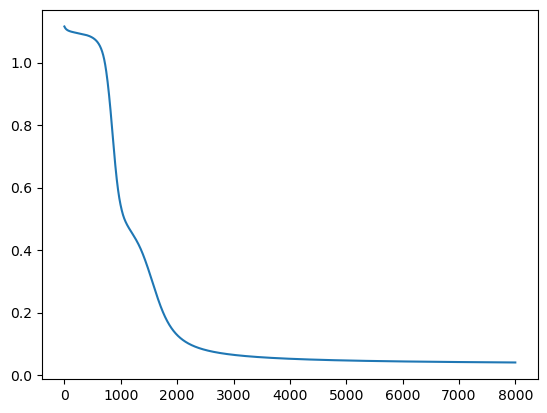

In [18]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.02)
losses = []
for epoch in range(8000):
    optimizer.zero_grad()
    out = model(train_x)
    train_y_one_hot = train_y_one_hot.float()
    loss = criterion(out, train_y_one_hot)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print('Epoch: {}, Loss: {}'.format(epoch, loss.item()))

plt.plot(losses)
plt.show()

In [19]:
# Predict the test data
out = model(test_x)
_, predicted = torch.max(out.data, 1)
print('Predicted: ', predicted)
print('Actual: ', test_y.squeeze())

# Calculate the accuracy
correct = 0
total = len(predicted)
for i in range(total):
    if predicted[i] == test_y[i]:
        correct += 1
print('Accuracy of the network on the 30 test images: %d %%' % (
    100 * correct / total))

Predicted:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])
Actual:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2], dtype=torch.int32)
Accuracy of the network on the 30 test images: 96 %
